<a href="https://colab.research.google.com/github/Azizul2026/stock_prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas pandas_datareader scikit-learn matplotlib

Mean Squared Error: 2.113286704104163


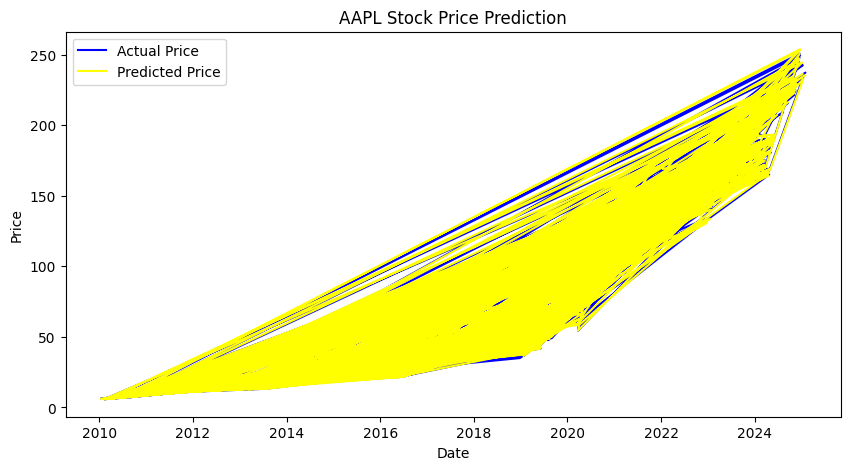

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas_datareader.data as web
import datetime

ticker = 'AAPL'
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime.now()
data = web.DataReader(ticker, 'stooq', start_date, end_date)

data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
data = data.dropna()  # Remove NaN values

X = data[['Close', 'MA_10', 'MA_50']]
y = data['Close'].shift(-1).dropna()  # Predicting the next day's price
X = X[:-1]  # Aligning X with y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test.values, label='Actual Price', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Price', color='Yellow')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()